# Data Analysis - cars


## Topics covered:

#### &emsp;1. Data Importing (via csv file)

#### &emsp;2. Data Preprocessing: cleaning, anomaly detection, data transformation, and dimensionality reduction (via PCA)

#### &emsp;3. Data Analysis/Predictive Analysis (Information acquisition through data analysis):

###### &emsp;&emsp;3.1 Correlations,

###### &emsp;&emsp;3.2 Clustering using unsupervised algorithm (via KMeans)

###### &emsp;&emsp;3.3 Predictive analysis using supervised algorithms (via Logistic Regression and Decision Tree)


## Importing libraries for analysis


In [423]:
# importing libraries
import pandas as pd # library to present data in dataframe format
import numpy as np # library for array operations
import matplotlib.pyplot as plt # library for plotting data
import seaborn as sn # library used to plot graphs in a more "elegant" format



from sklearn.preprocessing import StandardScaler # library for data preprocessing for ML analysis
from sklearn.decomposition import PCA # library for principal component analysis

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # libraries for analyzing ML model effectiveness
from sklearn.model_selection import train_test_split # library to partition data into training and testing sets
from sklearn import linear_model as lm # library for linear analysis of data

from sklearn.cluster import KMeans # library for analysis using K-means
from sklearn.tree import DecisionTreeClassifier # library for analysis using decision tree

# importing the counter and defaultdict libraries to count the total data in each group of KMeans analysis
from collections import Counter, defaultdict

from mpl_toolkits.mplot3d import Axes3D # importing the Axes3D library from matplotlib to plot 3D graphs

from IPython.display import display

from tabulate import tabulate


In [549]:
# Storing the data from the cars dataset in the car dataframe using pandas

cars = pd.read_csv('./cars.csv')


In [550]:
cars.head()

,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand,Efficiency
0,8,350,165,4209,12,1972,US.,Not efficient
1,4,89,71,1925,14,1980,Europe.,Efficient
2,8,302,140,3449,11,1971,US.,Not efficient
3,8,400,150,3761,10,1971,US.,Not efficient
4,4,98,63,2051,17,1978,US.,Efficient


In [479]:
# remove the Efficieny column from the dataset and stor it for later use
efficiency = cars['Efficiency']
cars = cars.drop(columns=['Efficiency'])

## Analyzing the extracted data


#### Manual data analysis


In [480]:
# checking dataframe information
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cylinders    261 non-null    int64 
 1   cubicinches  261 non-null    object
 2   hp           261 non-null    int64 
 3   weightlbs    261 non-null    object
 4   time-to-60   261 non-null    int64 
 5   year         261 non-null    int64 
 6   brand        261 non-null    object
dtypes: int64(4), object(3)
memory usage: 14.4+ KB


In [481]:
# counting the total cells to see if there are any null data
cars.count()

cylinders      261
cubicinches    261
hp             261
weightlbs      261
time-to-60     261
year           261
brand          261
dtype: int64

In [482]:
# checking the data statistics in the dataframe
cars.describe()

,cylinders,hp,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000
mean,5.590038,106.360153,15.547893,1976.819923
std,1.733310,40.499959,2.910625,3.637696
min,3.000000,46.000000,8.000000,1971.000000
25%,4.000000,75.000000,14.000000,1974.000000
50%,6.000000,95.000000,16.000000,1977.000000
75%,8.000000,138.000000,17.000000,1980.000000
max,8.000000,230.000000,25.000000,1983.000000


Now we are going to do more invetigations on this dataset to spot any annomaly


In [483]:
# checking if there are any duplicate data
cars.duplicated().sum()

0

In [484]:
# checking if there is any null data
cars.isnull().any()

cylinders      False
cubicinches    False
hp             False
weightlbs      False
time-to-60     False
year           False
brand          False
dtype: bool

In [485]:
# checking the types of regions of the models covered in the dataset
cars.brand.value_counts()

brand
US.        162
Japan.      51
Europe.     48
Name: count, dtype: int64

In [486]:
# checking the total cars in each year present in the dataset
cars.year.value_counts()

year
1974    35
1977    26
1971    23
1976    22
1980    21
1979    21
1978    18
1982    18
1981    18
1983    16
1973    16
1972    15
1975    12
Name: count, dtype: int64

In [487]:
# checking the classifications of the total number of cylinders in the engine present in the dataset models
cars.cylinders.value_counts()

cylinders
4    125
8     76
6     55
5      3
3      2
Name: count, dtype: int64

#### Performing data cleaning


In [488]:
# creating a copy of the dataframe to modify without altering the original dataframe
cars2 = cars.copy()

# changing the regions of the models to categorical values for machine learning analysis
cars2.brand = cars2.brand.replace(to_replace = ["US.", "Japan.", "Europe."], value = [1,2,3], regex = True)

cars2.head()

C:\Users\abdob\AppData\Local\Temp\ipykernel_1936\422760579.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars2.brand = cars2.brand.replace(to_replace = ["US.", "Japan.", "Europe."], value = [1,2,3], regex = True)


,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,8,350,165,4209,12,1972,1
1,4,89,71,1925,14,1980,3
2,8,302,140,3449,11,1971,1
3,8,400,150,3761,10,1971,1
4,4,98,63,2051,17,1978,1


In [489]:
# checking that the count of values is still the same
cars2.brand.value_counts()

brand
1    162
2     51
3     48
Name: count, dtype: int64

In [490]:
cars2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cylinders    261 non-null    int64 
 1   cubicinches  261 non-null    object
 2   hp           261 non-null    int64 
 3   weightlbs    261 non-null    object
 4   time-to-60   261 non-null    int64 
 5   year         261 non-null    int64 
 6   brand        261 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 14.4+ KB


changing the data in the volume(cubicinches) and weight(weightlbs) columns from objects to numeric data


In [491]:
cars2.cubicinches = pd.to_numeric(cars2.cubicinches, errors = "coerce") # changing volume data to numeric
cars2.weightlbs = pd.to_numeric(cars2.weightlbs, errors = "coerce") # changing weight data to numeric
cars2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cylinders    261 non-null    int64  
 1   cubicinches  259 non-null    float64
 2   hp           261 non-null    int64  
 3   weightlbs    258 non-null    float64
 4   time-to-60   261 non-null    int64  
 5   year         261 non-null    int64  
 6   brand        261 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 14.4 KB


In [492]:
# checking the total data that have NA values
cars2.isna().sum()

cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64

In [493]:
# checking which rows contain data with NA values
rows1 = cars2[cars2['cubicinches'].isnull()].index.tolist() # get the index of rows with NA values in the cubicinches column
rows2 = cars2[cars2['weightlbs'].isnull()].index.tolist() # get the index of rows with NA values in the weightlbs column

# displaying the contents of the arrays on the screen
print(rows1) # displaying the contents of the rows1 array
print(rows2) # displaying the contents of the rows2 array


[40, 180]
[14, 33, 172]


In [494]:
## Comparing the rows containing NA values in both the cars and cars2 dataframes

# Combine the rows containing NA values into a single array
rows = rows1 + rows2

# Create a dataframe to store the lines from the dataframes that are in the lines stored in the rows array
printer = pd.DataFrame(data=None, columns=cars2.columns, index=range(len(rows)))

# Copy the content of lines from cars and cars2 dataframes to the printer dataframe using list comprehension
printer = pd.DataFrame([cars2.loc[i, :] for i in rows], columns=cars2.columns)
printer['Rows'] = rows

# Report the content of the printer dataframe
print(printer)


     cylinders  cubicinches     hp  weightlbs  time-to-60    year  brand  Rows
40         6.0          NaN  105.0     3897.0        19.0  1976.0    1.0    40
180        6.0          NaN   85.0     2990.0        18.0  1980.0    1.0   180
14         6.0        225.0   90.0        NaN        19.0  1981.0    1.0    14
33         6.0        199.0   90.0        NaN        15.0  1971.0    1.0    33
172        4.0         68.0   49.0        NaN        20.0  1974.0    3.0   172


In [495]:
# replacing NA values in dataframe2 with the mean of the values in each column
# note: this is necessary so as not to lose data information when using the ML model
cars2 = cars2.fillna(cars2.mean())

# reporting the information from each of the original dataframes for comparison
print(cars.info())
print()
print(cars2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cylinders    261 non-null    int64 
 1   cubicinches  261 non-null    object
 2   hp           261 non-null    int64 
 3   weightlbs    261 non-null    object
 4   time-to-60   261 non-null    int64 
 5   year         261 non-null    int64 
 6   brand        261 non-null    object
dtypes: int64(4), object(3)
memory usage: 14.4+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cylinders    261 non-null    int64  
 1   cubicinches  261 non-null    float64
 2   hp           261 non-null    int64  
 3   weightlbs    261 non-null    float64
 4   time-to-60   261 non-null    int64  
 5   year         261 non-null    int64  
 6   brand        261 non-null

In [496]:
## checking if the changes made in the cars2 dataframe were changed correctly

# creating a dataframe to display the data present in the cars2 dataframe
printer3 = pd.DataFrame(data=None, columns=cars2.columns, index=range(len(rows)))

# creating a for loop to insert the data present in these lines into the created dataframes
j = 0 # initializing the counter for the line of the printer1 and printer2 dataframes
for i in rows:
    printer3.loc[j,:] = cars2.loc[i,:] # copying the content of line i from the cars2 dataframe to the printer2 dataframe
    j = j + 1 # updating the counter
# adding a column with the line numbers with NA values from the original dataframes to the printer3 dataframe
printer3['Rows'] = rows

# reporting the data stored in the printer3 dataframe to ensure that the data was correctly changed
print(printer3)

  cylinders cubicinches     hp    weightlbs time-to-60    year brand  Rows
0       6.0  200.918919  105.0       3897.0       19.0  1976.0   1.0    40
1       6.0  200.918919   85.0       2990.0       18.0  1980.0   1.0   180
2       6.0       225.0   90.0  3009.833333       19.0  1981.0   1.0    14
3       6.0       199.0   90.0  3009.833333       15.0  1971.0   1.0    33
4       4.0        68.0   49.0  3009.833333       20.0  1974.0   3.0   172


In [497]:
# reporting the statistical analysis of each column to verify that the inserted data is correct
cars2.describe()

,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923,1.563218
std,1.733310,108.837269,40.499959,849.097575,2.910625,3.637696,0.784972
min,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000,1.000000
25%,4.000000,101.000000,75.000000,2254.000000,14.000000,1974.000000,1.000000
50%,6.000000,156.000000,95.000000,2904.000000,16.000000,1977.000000,1.000000
75%,8.000000,302.000000,138.000000,3664.000000,17.000000,1980.000000,2.000000
max,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000,3.000000


#### Statistical Analysis to Detect Data Anomalies


<Axes: >

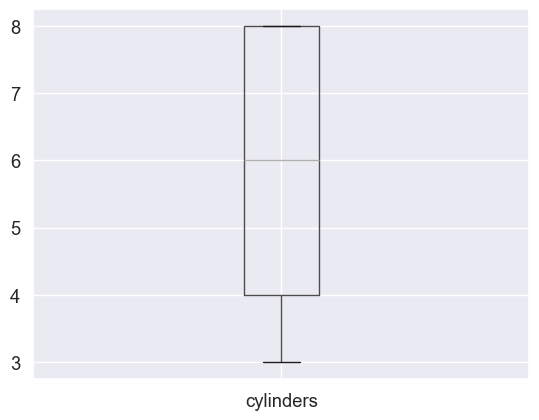

In [499]:
cars2.boxplot(column = 'cylinders') # plotting the boxplot graph for the total number of cylinders(cylinders)

<Axes: >

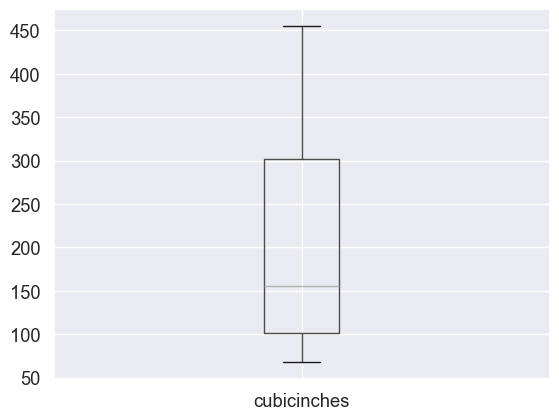

In [500]:
cars2.boxplot(column = 'cubicinches') # plotting the boxplot graph for the volume(cubicinches)

<Axes: >

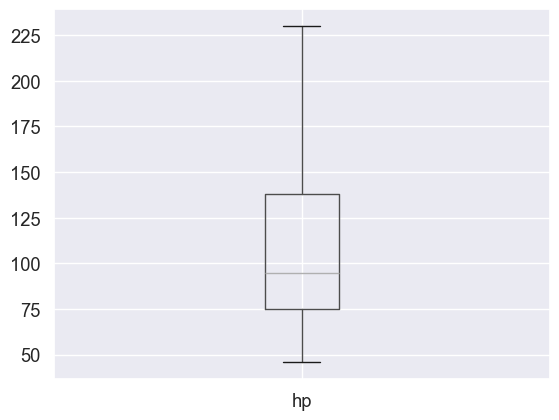

In [501]:
cars2.boxplot(column = 'hp') # plotting the boxplot graph for the power(hp)

<Axes: >

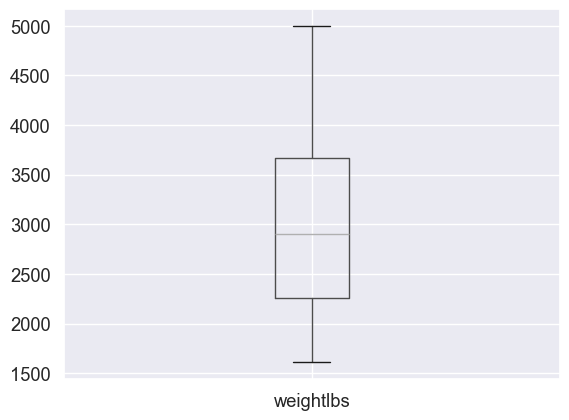

In [502]:
cars2.boxplot(column = 'weightlbs') # plotting the boxplot graph for the weight(weightlbs)

<Axes: >

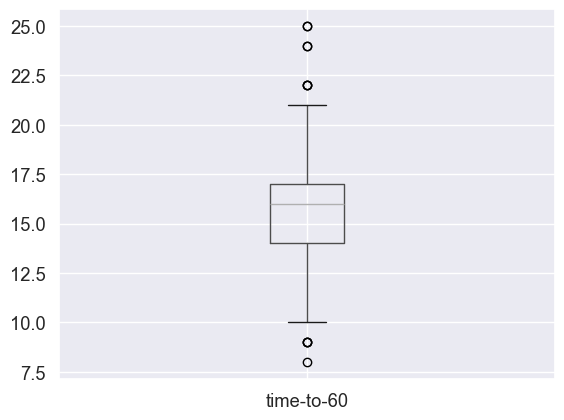

In [503]:
cars2.boxplot(column = 'time-to-60') # plotting the boxplot graph for the time-to-60mph

Upon analyzing the above boxplot, there are indications of possible outliers, however, for the parameter under analysis, upon a closer analysis of the values, it is possible to identify that these values are feasible for the time it takes for the car to reach 60 miles per hour, since there are cars with much lower values (less than 3 seconds) than the minimum value in the dataset (8 seconds), and cars with values much higher than the maximum value in the dataset (25 seconds).


<Axes: >

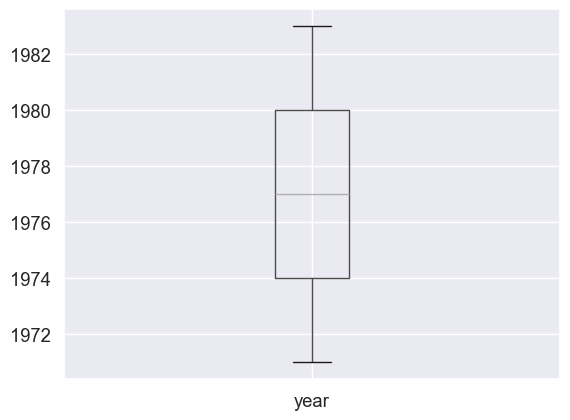

In [504]:
cars2.boxplot(column = 'year') # plotting the boxplot graph for the year

<Axes: >

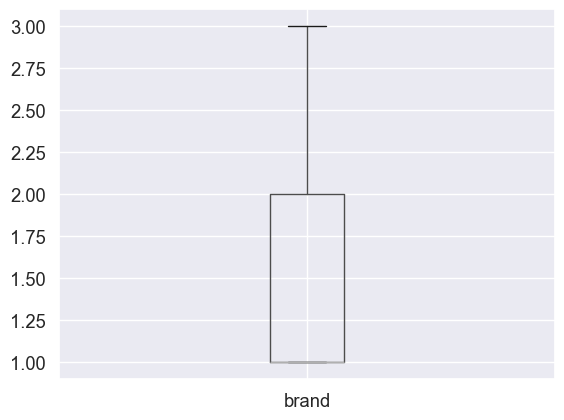

In [505]:
cars2.boxplot(column = 'brand') # plotting the boxplot graph for the brand

In [506]:
# checking the spread of the data in the boxplot

bins = [0, 75, 95, 138, float('inf')]  # define the bin ranges
labels = ['< Q1', 'Q1 - Median', 'Median - Q3', '> Q3']  # define the labels for each bin

hp_bins = pd.cut(cars2.hp, bins=bins, labels=labels)  # create bins for the hp column

hp_counts = hp_bins.value_counts()  # count the number of values in each bin

print(hp_counts)


hp
Q1 - Median    71
< Q1           66
> Q3           65
Median - Q3    59
Name: count, dtype: int64


Upon evaluating the spread of the data, it is possible to see that the data is relatively "balanced" and there is no apparent evidence of possible outliers.


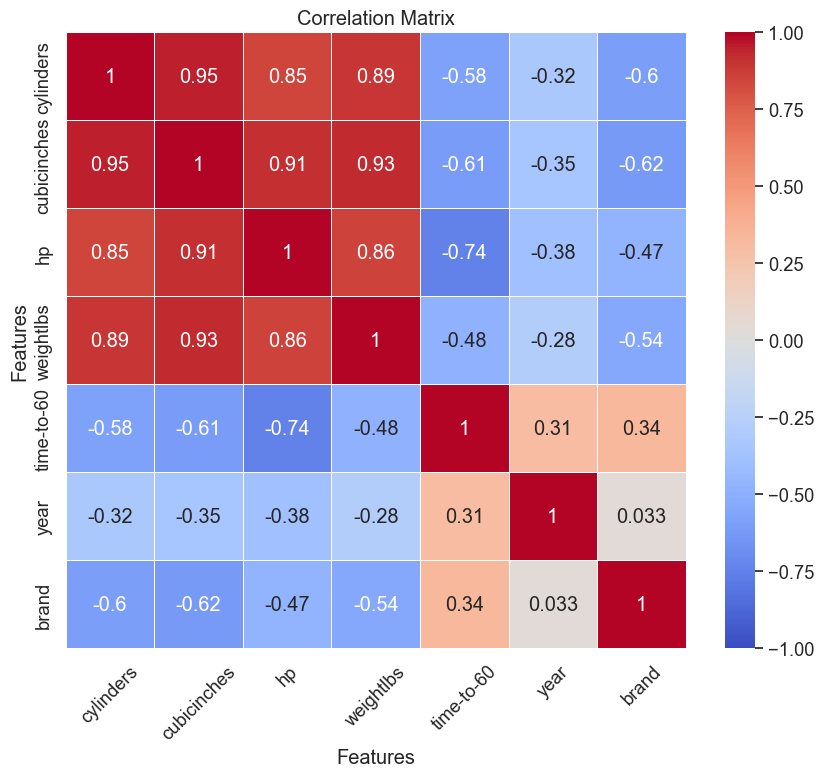

In [507]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))  # Set the figure size
sns.set(font_scale=1.2)  # Set the font scale for better readability

# Construct the correlation matrix
correlation_matrix = cars2.corr()

# Create a heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=0.5)

# Set the title and axis labels
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


Upon reviewing the correlation matrix, it is possible to identify a high correlation (>0.7) between mileage(mpg), total cylinders (cylinders), volume (cubicinches), power (hp), and weight (weightlbs).


#### Normalizing the Data


In [510]:
# creating a copy dataframe of the cars2 dataframe to normalize the data for ML analysis
dftest = cars2.copy()

# performing data preprocessing by normalizing the data using the StandardScaler() function from the sklearn library
normalize = StandardScaler() # initializing the standardscaler function

# replacing the values in the dataframe with the normalized values using the StandardScaler function
dftest[['cylinders','cubicinches','hp','weightlbs','time-to-60'
        ,'year']] = normalize.fit_transform(dftest[['cylinders','cubicinches','hp','weightlbs'
                                                    ,'time-to-60','year']])

# reporting the data present in the dftest dataframe
dftest.head()

,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,1.393053,1.372393,1.450681,1.414997,-1.221287,-1.327539,1
1,-0.919105,-1.030290,-0.874768,-1.280086,-0.532829,0.875880,3
2,1.393053,0.930520,0.832210,0.518209,-1.565516,-1.602966,1
3,1.393053,1.832677,1.079598,0.886364,-1.909745,-1.602966,1
4,-0.919105,-0.947439,-1.072679,-1.131408,0.499857,0.325025,1


In [511]:
# describing the data from the dataframe to verify data normalization (mean =~ 0 and std =~1)
dftest.describe()

,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
count,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,261.000000
mean,1.837611e-16,-1.276118e-16,1.174029e-16,-1.803581e-16,-2.041789e-16,-2.637311e-15,1.563218
std,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,0.784972
min,-1.497144e+00,-1.223609e+00,-1.493239e+00,-1.648240e+00,-2.598203e+00,-1.602966e+00,1.000000
25%,-9.191048e-01,-9.198217e-01,-7.758132e-01,-8.918710e-01,-5.328295e-01,-7.766842e-01,1.000000
50%,2.369740e-01,-4.135093e-01,-2.810368e-01,-1.248816e-01,1.556284e-01,4.959804e-02,1.000000
75%,1.393053e+00,9.305202e-01,7.827325e-01,7.719060e-01,4.998573e-01,8.758803e-01,2.000000
max,1.393053e+00,2.338990e+00,3.058704e+00,2.344824e+00,3.253689e+00,1.702163e+00,3.000000


In [512]:
# checking the maximum value present in the hp column of the dftest dataframe
dftest.hp.max()

3.05870398977614

In [513]:
# checking mathematically how the value would be after normalization (normalized value = (value - mean) / standard deviation)
tests = (cars2.hp - cars2.hp.mean()) / (cars2.hp.std()) # calculating the standardized values manually
tests.max() # checking the maximum standardized value manually

3.0528387801804

#### Visualising PCA


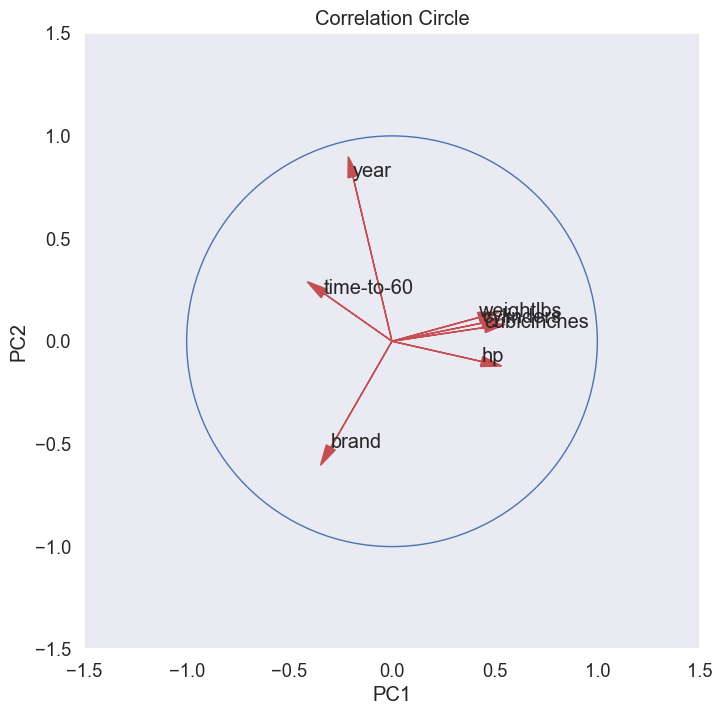

In [517]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_correlation_circle(data):
    # Compute the correlation matrix
    corr_matrix = data.corr()

    # Eigen decomposition of the correlation matrix
    eig_values, eig_vectors = np.linalg.eig(corr_matrix)

    # Length of the variables
    var_length = np.sqrt(eig_values)

    # Get the sorted indices of eigenvalues
    sorted_indices = np.argsort(eig_values)[::-1]

    # Get the sorted eigenvalues and eigenvectors
    sorted_eig_values = eig_values[sorted_indices]
    sorted_eig_vectors = eig_vectors[:, sorted_indices]

    # Plotting
    plt.figure(figsize=(8, 8))
    plt.title('Correlation Circle')

    # Plot circle
    circle = plt.Circle((0, 0), 1, color='b', fill=False)
    plt.gca().add_artist(circle)

    # Plot arrows representing variables
    for i in range(len(data.columns)):
        plt.arrow(0, 0, sorted_eig_vectors[i, 0], sorted_eig_vectors[i, 1],
                  head_width=0.05, head_length=0.1, fc='r', ec='r')
        plt.text(sorted_eig_vectors[i, 0], sorted_eig_vectors[i, 1], data.columns[i])

    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()


# Plot correlation circle
plot_correlation_circle(cars2)


The correlation circle plot visualizes how variables contribute to principal components in PCA. Longer arrows indicate greater importance, while angles between arrows show relationships between variables. Closer arrows suggest similar patterns, while farther ones indicate less correlation. Understanding these relationships helps in dimension reduction and interpretation of data patterns.


#### Reducing Data Dimensionality


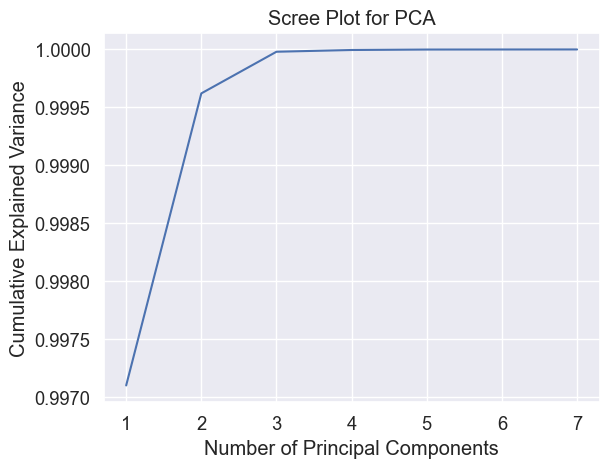

In [518]:
# Perform PCA
pca = PCA()
pca.fit(cars2)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the scree plot
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot for PCA')
plt.show()


In [519]:
# performing a PCA analysis of the data
pca = PCA(n_components = 3) # initializing PCA with a total of 3 components

# modeling the data with the pca analysis
principalcomponents = pca.fit_transform(dftest[['cylinders','cubicinches','hp','weightlbs','time-to-60','year']])


In [520]:
# checking the variance of the data when using each SVD (singular value dec.) from PCA
print(pca.explained_variance_ratio_)

[0.71926912 0.14336765 0.09906189]


In [521]:
# checking the singular values obtained in the PCA analysis
print(pca.singular_values_)

[33.56151732 14.98378259 12.45515642]


In [522]:
# creating a dataframe to show the data according to the PCA analysis
principalDf = pd.DataFrame(data = principalcomponents
                           , columns = [f'PC{i+1}' for i in range(principalcomponents.shape[1])])
principalDf.head()

,PC1,PC2,PC3
0,3.280585,0.632121,0.069800
1,-1.865829,-0.117613,-1.338416
2,2.575359,1.231067,-0.430040
3,3.393644,1.064448,-0.495242
4,-2.097263,0.199818,-0.212392


#### Performing Cluster Analysis with KMeans for PCA Data and comparing the results


In [524]:
# performing k-means analysis using the data decomposed with PCA
kmeans = KMeans(n_clusters=3, random_state=42)

########################### PCA ########################################
# fitting the data to the k-means model and obtaining cluster labels
pred_y = kmeans.fit_predict(principalDf)

# calculating the variance (inertia) of the k-means analysis with PCA
inertia_pca = kmeans.inertia_
print("Variance (Inertia) of K-means Analysis with PCA:")
print(inertia_pca)

########################### ORIGINAL Processed Data ########################################
kmeans2 = KMeans(n_clusters=3, random_state=42)

# fitting the data to the k-means model and obtaining cluster labels
pred_y2 = kmeans2.fit_predict(dftest[[ 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']])

# calculating the variance (inertia) of the k-means analysis with the original processed data
inertia_original = kmeans2.inertia_
print("Variance (Inertia) of K-means Analysis with Original Processed Data:")
print(inertia_original)


Variance (Inertia) of K-means Analysis with PCA:
462.3671626706924
Variance (Inertia) of K-means Analysis with Original Processed Data:
518.3415595379205


In [525]:
## identifying the total data in each group reported by kmeans

# showing on the screen the total data in each group
print(Counter(kmeans.labels_))
print(Counter(kmeans2.labels_))

Counter({1: 129, 2: 72, 0: 60})
Counter({1: 129, 2: 71, 0: 61})


#### Performing Predictive Analysis with Supervised Algorithms (Decision Tree and Logistic Regression)


In [526]:
## comparing the cars2 and dftest dataframes
cars2.head()# showing the cars2 dataframe

,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,8,350.0,165,4209.0,12,1972,1
1,4,89.0,71,1925.0,14,1980,3
2,8,302.0,140,3449.0,11,1971,1
3,8,400.0,150,3761.0,10,1971,1
4,4,98.0,63,2051.0,17,1978,1


In [527]:
dftest.head() # showing the dftest dataframe

,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,1.393053,1.372393,1.450681,1.414997,-1.221287,-1.327539,1
1,-0.919105,-1.030290,-0.874768,-1.280086,-0.532829,0.875880,3
2,1.393053,0.930520,0.832210,0.518209,-1.565516,-1.602966,1
3,1.393053,1.832677,1.079598,0.886364,-1.909745,-1.602966,1
4,-0.919105,-0.947439,-1.072679,-1.131408,0.499857,0.325025,1


In [528]:
from sklearn.model_selection import train_test_split
def split_data(inputs, output, test_size=0.3, random_state=42):
    # adding the input data as a matrix x
    x = inputs

    # adding the output data as a vector y
    y = output

    # randomly partitioning the data into training and testing
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
    
    return X_train, y_train, X_test, y_test

In [543]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


import matplotlib.pyplot as plt

def decision_tree_analysis(X_train, y_train, X_test, y_test):
    # performing the decision tree analysis
    clf_tree = DecisionTreeClassifier(random_state=42)  # initializing the classifier
    clf_tree.fit(X_train, y_train)  # modeling the tree according to the data values
    result_tree = clf_tree.predict(X_test)  # calculating the predicted values by the model with the test data

    # checking the accuracy of the created model
    accuracy_tree = accuracy_score(y_test, result_tree)
    print('Accuracy Decision Tree:', accuracy_tree)
    print()

    
    cm = confusion_matrix(y_test, result_tree)


    # reporting metrics data for model evaluation (precision, recall, f1-score,...)
    print(classification_report(y_test, result_tree))
    
    # return accuracy
    return accuracy_tree,cm


In [538]:
x_train, y_train, x_test, y_test = split_data(dftest[['cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']], efficiency)
X_trainPCA, y_trainPCA, X_testPCA, y_testPCA = split_data(principalDf, efficiency)

In [545]:
accuracy_tree,cm = decision_tree_analysis(x_train, y_train, x_test, y_test)
accuracy_treePCA,cmPCA = decision_tree_analysis(X_trainPCA, y_trainPCA, X_testPCA, y_testPCA)

Accuracy Decision Tree: 0.8987341772151899

               precision    recall  f1-score   support

    Efficient       0.89      0.89      0.89        38
Not efficient       0.90      0.90      0.90        41

     accuracy                           0.90        79
    macro avg       0.90      0.90      0.90        79
 weighted avg       0.90      0.90      0.90        79

Accuracy Decision Tree: 0.8860759493670886

               precision    recall  f1-score   support

    Efficient       0.94      0.82      0.87        38
Not efficient       0.85      0.95      0.90        41

     accuracy                           0.89        79
    macro avg       0.89      0.88      0.88        79
 weighted avg       0.89      0.89      0.89        79



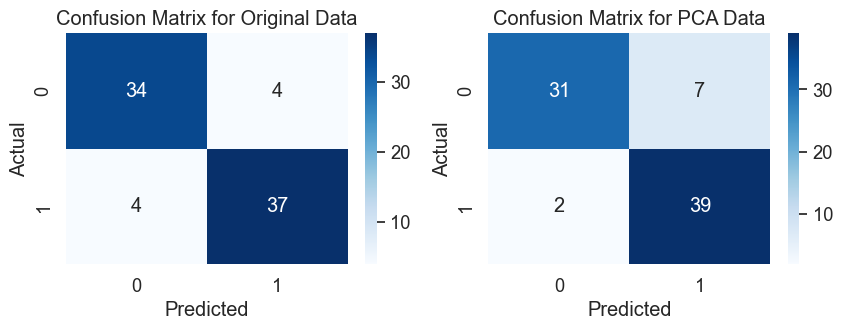

In [547]:
# plot confusion matrixes cm cmPCA

fig, ax = plt.subplots(1, 2, figsize=(10,3 ))

# Plot confusion matrix for the original data
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix for Original Data')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# Plot confusion matrix for the PCA data
sns.heatmap(cmPCA, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix for PCA Data')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.show()

In [548]:
# Create a table with the accuracy values
table = [["Model", "Accuracy"],
         ["Decision Tree (Original)", accuracy_tree],
         ["Decision Tree (PCA)", accuracy_treePCA]] 

# Display the table
print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))

╒══════════════════════════╤════════════╕
│ Model                    │   Accuracy │
╞══════════════════════════╪════════════╡
│ Decision Tree (Original) │   0.898734 │
├──────────────────────────┼────────────┤
│ Decision Tree (PCA)      │   0.886076 │
╘══════════════════════════╧════════════╛


By analyzing the model parameters, it is possible to identify a good classification of the data, with a high value for the f1-score metric


In [533]:
## Performing linear regression to try to predict efficiency data to compare with the decision tree

clf_regr = lm.LogisticRegression(random_state=42) # initializing the linear regression model
clf_regr.fit(x_train, np.ravel(y_train)) # modeling linear regression with the same data used in the decision tree
result_logistic = clf_regr.predict(x_test) # calculating the predicted values by the model for the test data

# checking the accuracy of the created model
accuracy_logistic = accuracy_score(y_test, result_logistic)

# displaying the accuracy value on the screen
print('Logistic Regression Accuracy: ', accuracy_logistic)
print() # adding a space in the output to show the confusion matrix data

# reporting the confusion matrix
print(confusion_matrix(y_test, result_logistic))

# reporting the metric data for model evaluation (precision, recall, f1-score,...)
print(classification_report(y_test, result_logistic))

Logistic Regression Accuracy:  0.8987341772151899

[[33  5]
 [ 3 38]]
               precision    recall  f1-score   support

    Efficient       0.92      0.87      0.89        38
Not efficient       0.88      0.93      0.90        41

     accuracy                           0.90        79
    macro avg       0.90      0.90      0.90        79
 weighted avg       0.90      0.90      0.90        79



When analyzing the model parameters, it's also possible to identify a good classification of the data, with a high value for the f1-score metric.

Furthermore, when comparing the models obtained with the decision tree and logistic regression, it's possible to identify that both methods were effective in predicting whether the car would be efficient or not through the analysis of car data (cylinders, volume, power, weight, time-to-60mph), where both methods presented models with similar values for the metric.
